# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc

# EDA

## Reading Data

In [ ]:
data = pd.read_csv('train.csv')
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
data.describe()
# We can see that mean and median is approx. the same in:
# CreditScore, Age, Tenure & EstimatedSalary columns, which means data in these columns are balancing skewed
# We can also conclude that id, CustomerId and Surname columns are not important with us

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Preprocessing Dataset

## Dropping Unnecessary Columns

In [ ]:
data.drop(['id', 'CustomerId'], axis=1, inplace=True)
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## Encoding Categorical Data

In [ ]:
le = LabelEncoder()
data['Surname'] = le.fit_transform(data['Surname'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])
data

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## Smotting

In [ ]:
smote = SMOTE(random_state = 45)
X = data.drop('Exited', axis=1)
y = data['Exited']
X_smote, y_smote = smote.fit_resample(X, y)
data_smote = pd.concat([X_smote, y_smote], axis=1)

In [ ]:
# Calculating Duplicates
data_smote.duplicated().sum()

203

In [ ]:
# Removing Duplicates
data_smote.drop_duplicates(inplace=True)
data_smote

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1924,668,0,1,33.000000,3,0.000000,2,1.000000,0.000000,181449.970000,0
1,1925,627,0,1,33.000000,1,0.000000,2,1.000000,1.000000,49503.500000,0
2,1178,678,0,1,40.000000,10,0.000000,2,1.000000,0.000000,184866.690000,0
3,1299,581,0,1,34.000000,2,148882.540000,1,1.000000,1.000000,84560.880000,0
4,467,716,2,1,33.000000,5,0.000000,2,1.000000,1.000000,15068.830000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
260221,777,565,2,0,53.177333,3,0.000000,1,1.000000,0.000000,135083.686574,1
260222,255,628,1,0,63.660335,8,0.000000,1,0.910013,0.089987,115029.098718,1
260223,1526,680,0,0,36.518232,6,0.000000,1,1.000000,0.000000,170574.768074,1
260224,2704,635,1,0,38.710894,1,0.000000,1,1.000000,0.644553,63106.395443,1


# Visualizing the dataset

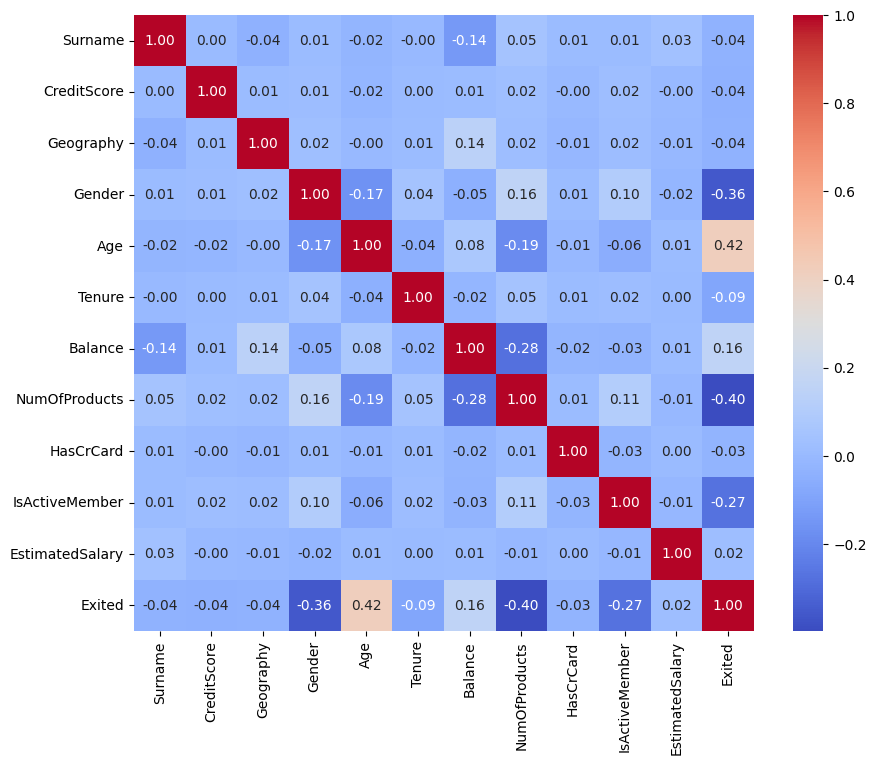

In [ ]:
corr_matrix = data_smote.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")
plt.show()

# Modeling

# Splitting the dataset

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Training the model

In [ ]:
rf_smote = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=45)
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=45)

# Evaluating the model

### Results


In [ ]:
y_pred = rf_smote.predict(X_test_smote)

print("Accuracy:", accuracy_score(y_test_smote, y_pred))
print("F1 Score:", f1_score(y_test_smote, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test_smote, y_pred))

Accuracy: 0.860949928909042
F1 Score: 0.8600924082200785
ROC AUC Score: 0.8609537479105911


## Roc Curve

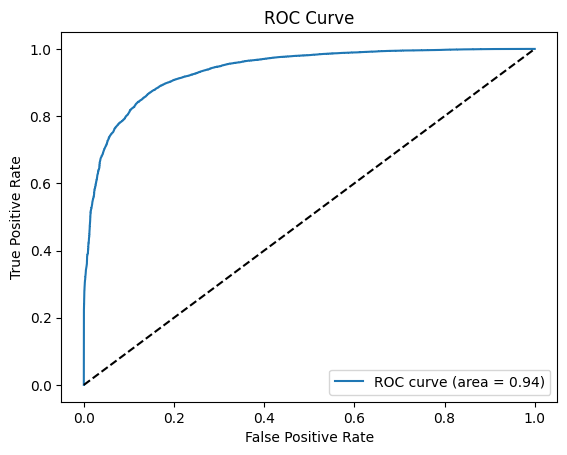

In [ ]:
y_proba = rf_smote.predict_proba(X_test_smote)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_smote, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()